cleaning up all over again

In [1]:
from conv_reproj import match
from align_and_diff import a_d
from header_setup import read

from matplotlib import pyplot as plt
import numpy as np

from astropy.io import fits
from pm import pm_correct
from astropy import units as u
from astropy.wcs import WCS
import cmasher as cmr

from astropy.time import Time
from astropy.coordinates import SkyCoord

Match function imported.
running


In [2]:
from everything import full_analysis

Ready to go!


In [3]:
from radial import radial_read
from dens import density_model

In [4]:
from everything import plot_1d, plot_2d

lr = 'jan29_data/from_server/Betelgeuse_TC_cont.image.image.pbcor.fits' \
hr = 'jan29_data/from_server/Betelgeuse_all_cont_1-1.image.image.tt0.fits'

In [5]:
hr = 'jan29_data/from_server/Betelgeuse_TE_cont_R0.image.image.tt0.fits'
lr = 'jan29_data/from_server/Betelgeuse_all_cont_1-1.image.image.tt0.fits'


data3, data_1d3, radius3, data_dens_1d3, data_dens_2d3, data_plot3, info3 = full_analysis(hr,lr)
# this should be lr
info3['lr']['kspatres']
# this should be hr


False
First epoch shifted to second.
Header information imported.
Header information imported.


indices in parameterized keywords must not have leading zeroes. [astropy.wcs.wcs]
indices in parameterized keywords must not have leading zeroes. [astropy.wcs.wcs]
indices in parameterized keywords must not have leading zeroes. [astropy.wcs.wcs]
indices in parameterized keywords must not have leading zeroes. [astropy.wcs.wcs]
indices in parameterized keywords must not have leading zeroes. [astropy.wcs.wcs]
indices in parameterized keywords must not have leading zeroes. [astropy.wcs.wcs]
indices in parameterized keywords must not have leading zeroes. [astropy.wcs.wcs]
indices in parameterized keywords must not have leading zeroes. [astropy.wcs.wcs]
indices in parameterized keywords must not have leading zeroes. [astropy.wcs.wcs]
indices in parameterized keywords must not have leading zeroes. [astropy.wcs.wcs]
indices in parameterized keywords must not have leading zeroes. [astropy.wcs.wcs]
indices in parameterized keywords must not have leading zeroes. [astropy.wcs.wcs]
indices in param

Alignment and subtraction complete. Info dictionaries imported.


/Users/iman/anaconda3/lib/python3.11/site-packages/numpy/core/_methods.py:269: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/iman/anaconda3/lib/python3.11/site-packages/numpy/core/_methods.py:226: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean,
/Users/iman/anaconda3/lib/python3.11/site-packages/numpy/core/_methods.py:261: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/Users/iman/anaconda3/lib/python3.11/site-packages/astropy/units/quantity.py:666: RuntimeWarning: divide by zero encountered in power
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)
/Users/iman/anaconda3/lib/python3.11/site-packages/numpy/core/_methods.py:269: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/iman/anaconda3/lib/python3.11/site-packages/numpy

0.040566339161841755

In [6]:
from everything import plot_1d, plot_1d_err,plot_1d_skip

/Users/iman/Documents/cuny_ms/csm_pipeline/everything.py:276: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


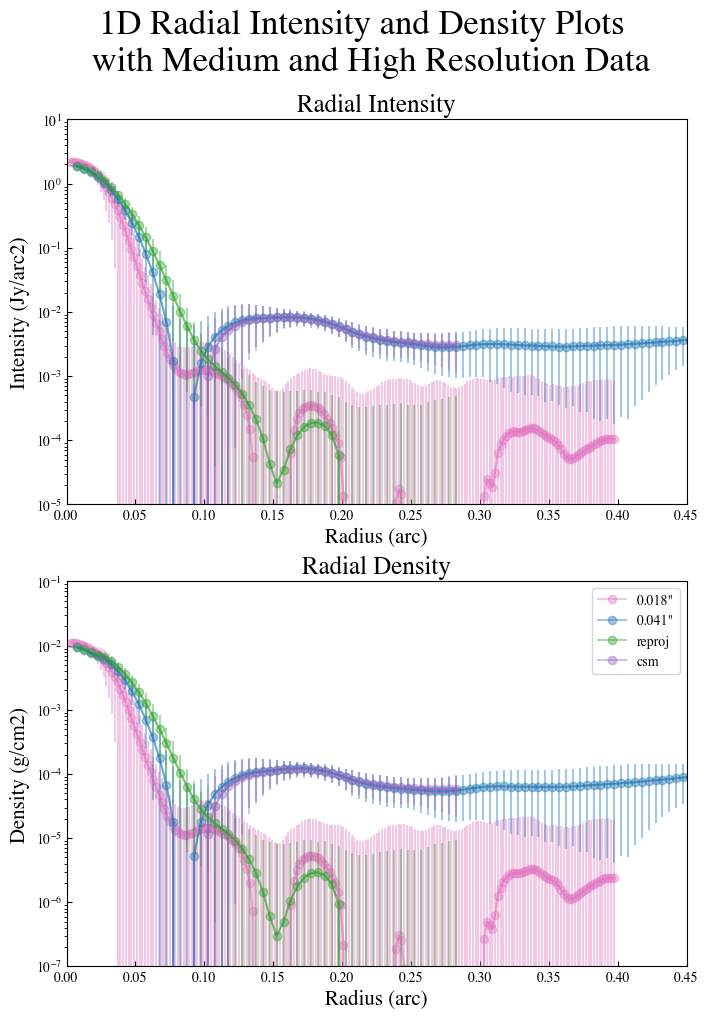

In [7]:
plot_1d(data_1d3, data_dens_1d3,info3,radius3,ax1_ymin=1e-5,ax1_ymax=1e1,ax2_ymin=1e-7,ax2_ymax=1e-1, 
        suptitle = "1D Radial Intensity and Density Plots \n with Medium and High Resolution Data")#,xmax=0.35)
#plt.savefig('thesis/medhigh/1d_radial_all_MH.png')

#plot_1d(data_1d3, data_dens_1d3,info3,radius3,ax1_ymin=-1e-1,ax1_ymax=6e5,ax2_ymin=1e0,ax2_ymax=1e1)#,xmax=0.35)

/Users/iman/Documents/cuny_ms/csm_pipeline/everything.py:328: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


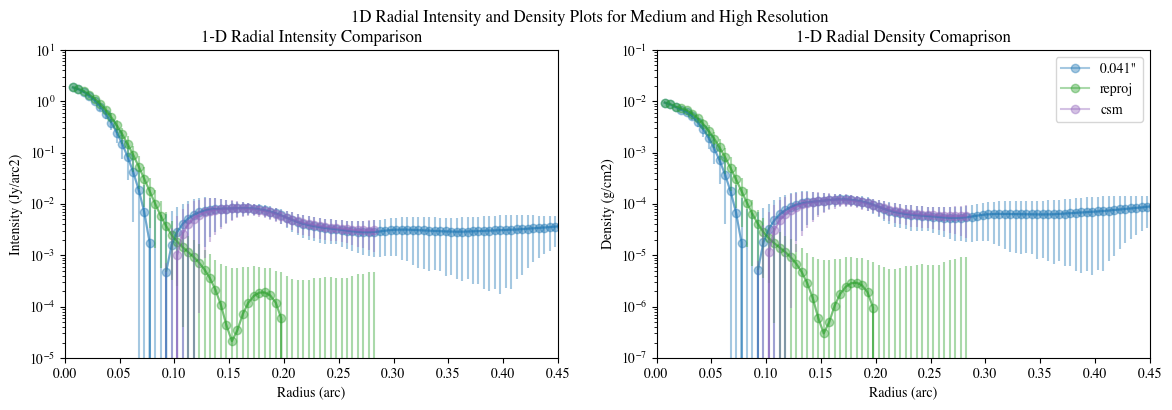

In [8]:
plot_1d_skip(data_1d3, data_dens_1d3,info3,radius3,ax1_ymin=1e-5,ax1_ymax=1e1,ax2_ymin=1e-7,ax2_ymax=1e-1,suptitle = "1D Radial Intensity and Density Plots for Medium and High Resolution")#,xmax=0.35)
# plt.savefig('thesis/medhigh/1d_radial_nohr_MH.png')

/Users/iman/Documents/cuny_ms/csm_pipeline/everything.py:221: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


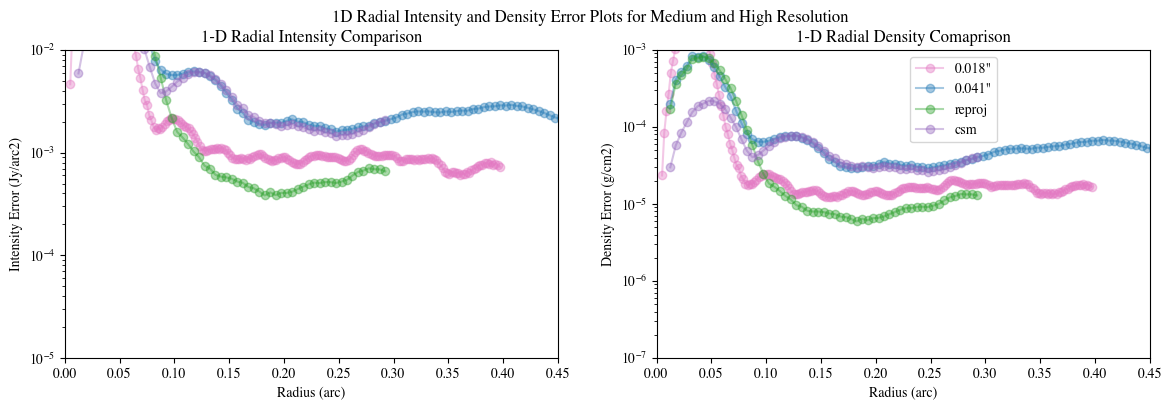

In [9]:
plot_1d_err(info3,radius3,ax1_ymin=1e-5,ax1_ymax=1e-2,ax2_ymin=1e-7,ax2_ymax=1e-3,suptitle ="1D Radial Intensity and Density Error Plots for Medium and High Resolution")#,xmax=0.35)
#plt.savefig('thesis/medhigh/1d_err_MH.png')

In [10]:
from dens import kappa
from astropy.modeling.models import BlackBody


In [11]:
def max_test(data_1d):
    title = ['hr','lr','reproj','csm']
    lmda_AA = 8.87e6*u.AA
    
    B = BlackBody(temperature = 3000*u.K)
    B=B(lmda_AA)
    arcsec2_per_sr=4.25e10*u.arcsec**2/u.sr
    ergcmshz_per_jy = 1.0e-23*u.erg/u.cm**2/u.s/u.Hz/u.Jy
    k = kappa(887.0*u.um)

    B_jy_arcsec2 = B/arcsec2_per_sr/ergcmshz_per_jy

    sigma={}

    for i in title:
        sigma[i]= np.nanmax(np.nanmax(data_1d[i]))/ (k*B_jy_arcsec2)

    return sigma


In [12]:
max_test(data_1d3)

{'hr': <Quantity 0.01111003 g / cm2>,
 'lr': <Quantity 0.00941045 g / cm2>,
 'reproj': <Quantity 0.0094502 g / cm2>,
 'csm': <Quantity 4.17848432e-05 g / cm2>}

In [13]:
print("hr: ",np.nanmax(data_dens_1d3['hr']))
print("lr: ",np.nanmax(data_dens_1d3['lr']))
print("reproj: ",np.nanmax(data_dens_1d3['reproj']))
print("csm: ",np.nanmax(data_dens_1d3['csm']))

hr:  0.011110034247982424 g / cm2
lr:  0.009410451338716383 g / cm2
reproj:  0.0094502016147055 g / cm2
csm:  0.0001210193479610102 g / cm2


csm, lr and reproj all get mapped to the same thing

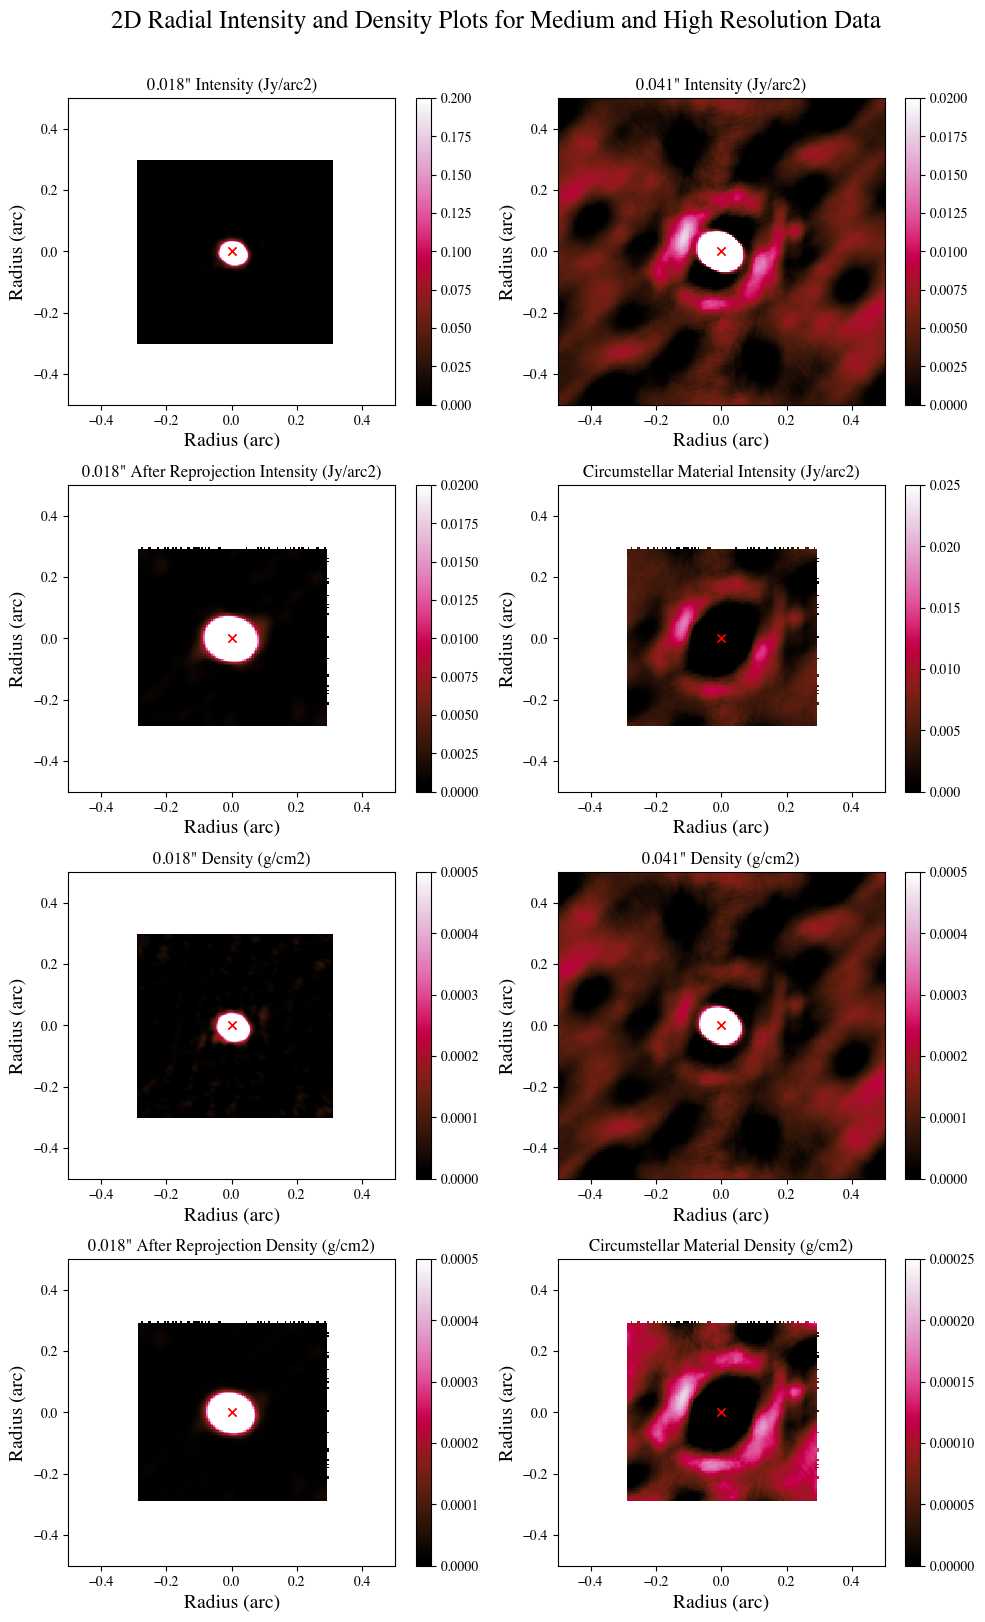

In [14]:
vminmax = [[0,.2], [0,.02],[0,.02],[0,0.025],
           [0,0.0005], [0,0.0005],[0,0.0005],[0,0.00025]]
plot_2d(data_plot3, info3, vminmax,minn=-.5, suptitle = "2D Radial Intensity and Density Plots for Medium and High Resolution Data")
#plt.savefig('thesis/medhigh/2D_plots_MH.png')

## Abel transform

In [15]:
from abel import all_abel, do_abel, plot_1d_abel

In [16]:
d = {'hr': data_1d3['hr'], 'lr': data_1d3['lr'], 'reproj': data_1d3['reproj'],"csm": data_1d3['csm']}

In [17]:
abels = all_abel(d,radius3)

/Users/iman/Documents/cuny_ms/csm_pipeline/abel.py:94: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


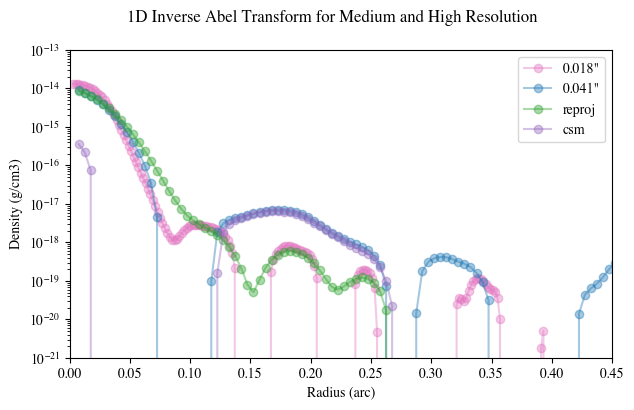

In [18]:
plot_1d_abel(abels,info3,radius3,ax_ymin=1e-21,ax_ymax=1e-13, suptitle = "1D Inverse Abel Transform for Medium and High Resolution")


In [19]:
info3['lr']['pix_size_arcsec']

<Quantity 0.005 arcsec>

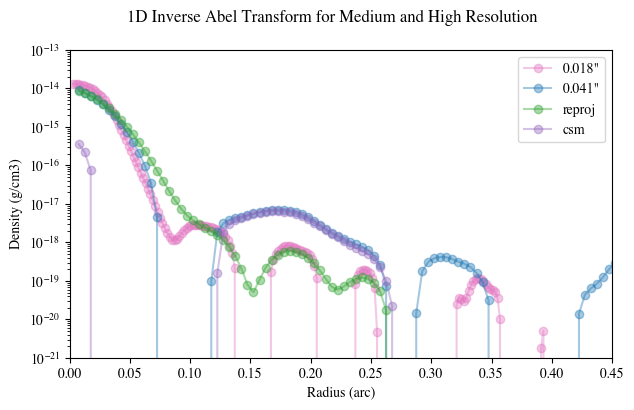

In [20]:
plot_1d_abel(abels,info3,radius3,ax_ymin=1e-21,ax_ymax=1e-13, suptitle = "1D Inverse Abel Transform for Medium and High Resolution")
#plt.savefig('thesis/medhigh/1d_abel_MH.png')

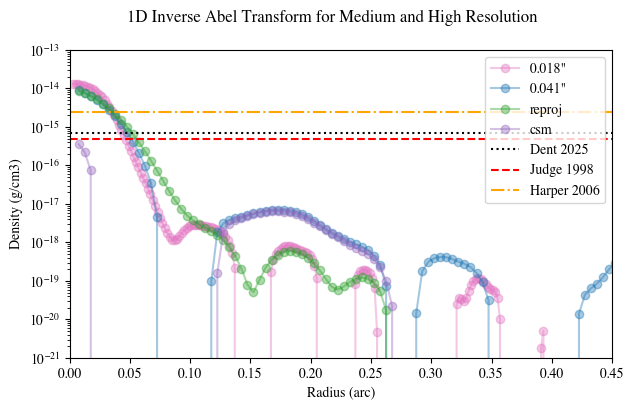

In [25]:
plot_1d_abel(abels,info3,radius3,ax_ymin=1e-21,ax_ymax=1e-13, suptitle = "1D Inverse Abel Transform for Medium and High Resolution" ,dent = True)
#plt.legend()
#plt.savefig('thesis/medhigh/1d_abel_MH.png')


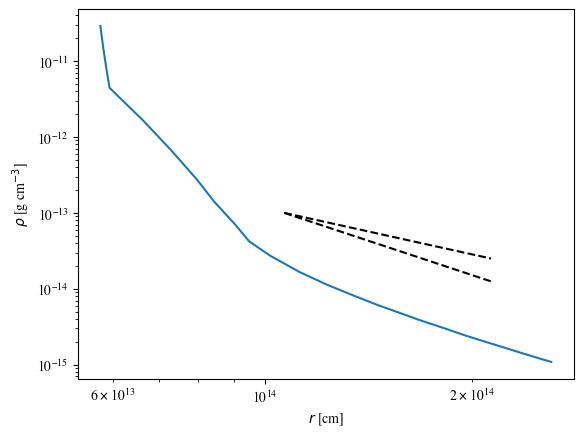

In [22]:
# H density from Dent et al via webplotdigitizer
data = np.asarray([[1.0801033591731268, 13.018018018018019],
[1.0904392764857884, 12.729729729729732],
[1.103359173126615, 12.423423423423424],
[1.1136950904392768, 12.202702702702704],
[1.245478036175711, 11.774774774774775],
[1.3695090439276487, 11.378378378378379],
[1.4935400516795867, 10.99099099099099],
[1.5813953488372094, 10.702702702702704],
[1.6950904392764858, 10.405405405405405],
[1.7777777777777781, 10.18018018018018],
[1.9069767441860466, 9.99099099099099],
[2.1059431524547803, 9.774774774774775],
[2.30749354005168, 9.608108108108109],
[2.524547803617571, 9.463963963963964],
[2.739018087855297, 9.337837837837839],
[2.9586563307493536, 9.22972972972973],
[3.152454780361757, 9.13963963963964],
[3.4263565891472867, 9.031531531531531],
[3.648578811369509, 8.945945945945946],
[3.8656330749354, 8.873873873873872],
[4.118863049095607, 8.797297297297298],
[4.3824289405684755, 8.72072072072072],
[4.671834625322997, 8.644144144144143],
[4.89405684754522, 8.59009009009009],]).T

# pN = mr.MesaData()

RSUN = 6.98e10
fig, ax = plt.subplots()
scale = 764*RSUN
xaxis = data[0]*scale
yaxis = 10**data[1] * 1.6735575e-24 * (1/0.6)
ax.plot([2*scale,4*scale], [1e-13, 1e-13/4], linestyle='dashed', color='k')
ax.plot([2*scale,4*scale], [1e-13, 1e-13/8], linestyle='dashed', color='k')
ax.plot(xaxis, yaxis)
# ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xscale('log')
ax.set_xlabel(r'$r$ [cm]')
ax.set_ylabel(r'$\rho$ [g cm$^{-3}$]')
plt.show()

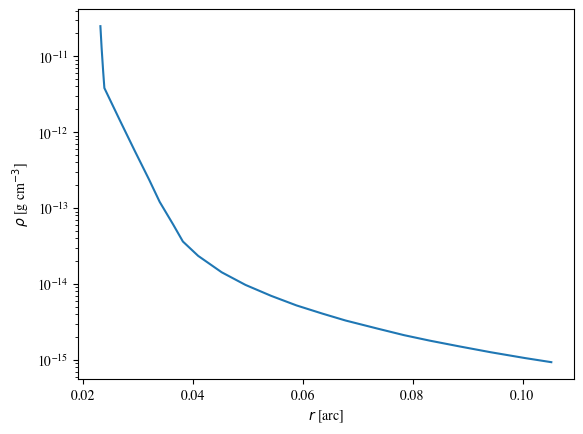

In [29]:
# H density from Dent et al via webplotdigitizer
data = np.asarray([[1.0801033591731268, 13.018018018018019],
[1.0904392764857884, 12.729729729729732],
[1.103359173126615, 12.423423423423424],
[1.1136950904392768, 12.202702702702704],
[1.245478036175711, 11.774774774774775],
[1.3695090439276487, 11.378378378378379],
[1.4935400516795867, 10.99099099099099],
[1.5813953488372094, 10.702702702702704],
[1.6950904392764858, 10.405405405405405],
[1.7777777777777781, 10.18018018018018],
[1.9069767441860466, 9.99099099099099],
[2.1059431524547803, 9.774774774774775],
[2.30749354005168, 9.608108108108109],
[2.524547803617571, 9.463963963963964],
[2.739018087855297, 9.337837837837839],
[2.9586563307493536, 9.22972972972973],
[3.152454780361757, 9.13963963963964],
[3.4263565891472867, 9.031531531531531],
[3.648578811369509, 8.945945945945946],
[3.8656330749354, 8.873873873873872],
[4.118863049095607, 8.797297297297298],
[4.3824289405684755, 8.72072072072072],
[4.671834625322997, 8.644144144144143],
[4.89405684754522, 8.59009009009009],]).T

# pN = mr.MesaData()

fig, ax = plt.subplots()
xaxis = data[0]*21.5/1000
yaxis = 10**data[1] * 1.6735575e-24 * (1/0.7)
# ax.plot([2*scale,4*scale], [1e-13, 1e-13/4], linestyle='dashed', color='k')
# ax.plot([2*scale,4*scale], [1e-13, 1e-13/8], linestyle='dashed', color='k')
ax.plot(xaxis, yaxis)
# ax.set_xscale('log')
ax.set_yscale('log')
#ax.set_xscale('log')
ax.set_xlabel(r'$r$ [arc]')
ax.set_ylabel(r'$\rho$ [g cm$^{-3}$]')
plt.show()

In [33]:
def plot_1d_abel_distribution(data_abel_1d,info,radius,ax_ymin=1e-2, ax_ymax=1e4,xmin=0,xmax=0.45, suptitle = "1D Abel Transformation (g/cm3)", dent=False):
    '''
    plot 1d density and intensity functions.
    can select plot x and y limits. default values inputted otherwise
    '''
    lowcolor = 'steelblue'
    highcolor='crimson'


    plt.rcParams["font.family"] = "times"
    fig, ax = plt.subplots(1, 1, figsize = [7,4])
    fig.suptitle(suptitle)

    title = ['hr','lr','reproj','csm']
    labels = ['{res}"'.format(res = np.round(info['hr']['kspatres'],3)),
             '{res}"'.format(res = np.round(info['lr']['kspatres'],3)),
               "reproj", "csm"]    
    
    color = ['C6','C0','C2','C4']

    for j in range(len(title)):


            ax.plot(radius[title[j]]['arc_1d'][:len(data_abel_1d[title[j]])],data_abel_1d[title[j]]*200,'o-',alpha=0.4, label = labels[j], c = color[j])
            #ax.errorbar(radius[title[c]]['arc_1d'],data_1d[title[c]].value,yerr=info[title[c]]['error'].value, c = color[c])

    

    if(dent == True):
         plt.plot(xaxis,yaxis, label = ("Dent Distribution 2025"))



    ax.legend(loc = 'best', bbox_to_anchor=(0.5, 0.5, 0.5, 0.5))
    ax.set_xlim(xmin,xmax)
    ax.set_xlim(0,0.45)
    ax.set_ylim(ax_ymin, ax_ymax)
    ax.set_ylim(ax_ymin, ax_ymax)

    ax.semilogy()
#     ax.set_title("1-D Density (g/cm3)")
    ax.set_xlabel('Radius (arc)')
    ax.set_ylabel('Density (g/cm3)')


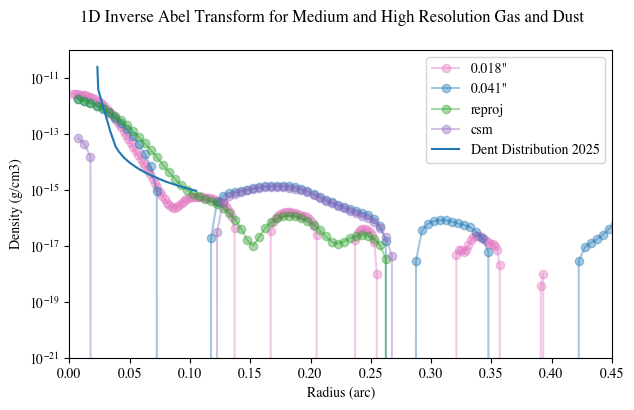

In [37]:
plot_1d_abel_distribution(abels,info3,radius3,ax_ymin=1e-21,ax_ymax=1e-10, suptitle = "1D Inverse Abel Transform for Medium and High Resolution Gas and Dust" ,dent = True)
#plt.legend()
#plt.savefig('thesis/medhigh/1d_abel_MH.png')


In [48]:
radius3['csm']['arc_1d'][15:]

<Quantity [0.0825, 0.0875, 0.0925, 0.0975, 0.1025, 0.1075, 0.1125, 0.1175,
           0.1225, 0.1275, 0.1325, 0.1375, 0.1425, 0.1475, 0.1525, 0.1575,
           0.1625, 0.1675, 0.1725, 0.1775, 0.1825, 0.1875, 0.1925, 0.1975,
           0.2025, 0.2075, 0.2125, 0.2175, 0.2225, 0.2275, 0.2325, 0.2375,
           0.2425, 0.2475, 0.2525, 0.2575, 0.2625, 0.2675, 0.2725, 0.2775,
           0.2825, 0.2875, 0.2925, 0.2975, 0.3025, 0.3075, 0.3125, 0.3175,
           0.3225, 0.3275, 0.3325, 0.3375, 0.3425, 0.3475, 0.3525, 0.3575,
           0.3625, 0.3675, 0.3725, 0.3775, 0.3825, 0.3875, 0.3925, 0.3975,
           0.4025, 0.4075, 0.4125, 0.4175, 0.4225, 0.4275, 0.4325, 0.4375,
           0.4425, 0.4475, 0.4525, 0.4575, 0.4625, 0.4675, 0.4725, 0.4775,
           0.4825, 0.4875, 0.4925, 0.4975, 0.5025, 0.5075, 0.5125, 0.5175,
           0.5225, 0.5275, 0.5325, 0.5375, 0.5425, 0.5475, 0.5525, 0.5575,
           0.5625, 0.5675, 0.5725, 0.5775, 0.5825, 0.5875, 0.5925, 0.5975,
           0.6025, 0.6075

In [51]:
np.sum(abels['csm'][15:][abels['csm'][15:]>0])*(4*np.pi*(6.171e13)**3) / 1.989e33

1.3545201665825714e-07

In [52]:
np.sum(abels['hr'][15:][abels['hr'][15:]>0])*(4*np.pi*(6.171e13)**3) / 1.989e33

2.0333868326322795e-05

In [155]:
def plot12d(data,info, suptitle,vminmax, minn=-.4):
    maxx= -minn

    figure,ax = plt.subplots(nrows = 1, ncols=1, figsize = (5,4))#, subplot_kw={'projection': wcs})
    figure.suptitle(suptitle, fontsize = 18, y=1.01)

    xaxis = range(data.shape[0])*info['pix_size_arcsec']-((info['position'][0])*info['pix_size_arcsec'])
    yaxis = range(data.shape[1])*info['pix_size_arcsec']-((info['position'][1])*info['pix_size_arcsec'])


    im = ax.pcolormesh(yaxis*1000,xaxis*1000,data*1000, cmap=cmr.sunburst,shading="nearest", vmin = vminmax[0], vmax = vminmax[1])
    ax.plot((info['position'][1])*info['pix_size_arcsec']-((info['position'][1])*info['pix_size_arcsec']),
            (info['position'][0])*info['pix_size_arcsec']-((info['position'][0])*info['pix_size_arcsec']),'rx')
    ax.plot(0,0,'rx')

    X,Y = np.meshgrid(yaxis, xaxis)
    #contour_levels = np.linspace(np.min(data), np.max(data), 8)

    cont = ax.contour(X*1000,Y*1000, data*1000,levels =6,colors= 'white',indexing = 'xy')
    ax.clabel(cont)


    ax.set_xlim(minn, maxx)
    ax.set_ylim(minn, maxx)

    figure.colorbar(im,ax=ax, label='mJy/beam')
    ax.set_xlabel("Radius (mas)" , size = 14)
    ax.set_ylabel("Radius (mas)", size = 14)

/var/folders/ly/x_9nwhsj0y7c7t4jnvrlhzzm0000gn/T/ipykernel_69678/3227086959.py:19: UserWarning: The following kwargs were not used by contour: 'indexing'
  cont = ax.contour(X*1000,Y*1000, data*1000,levels =6,colors= 'white',indexing = 'xy')


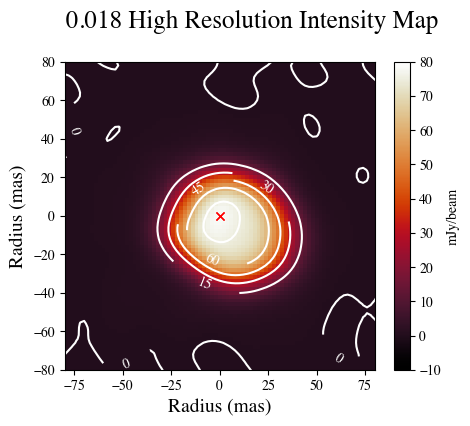

In [156]:
plot12d(data3['hr']['jy_beam'][0,0,...],info3['hr'],suptitle='0.018'' High Resolution Intensity Map', vminmax = [-10,80],minn=-80)

In [152]:
def plot12d2(data, info, suptitle, vminmax, minn=-0.08):
    maxx = -minn

    fig, ax = plt.subplots(figsize=(5, 4))
    fig.suptitle(suptitle, fontsize=14, y=1.02)

    # Define axis values (pixel edges for pcolormesh)
    xaxis = (np.arange(data.shape[0]) - info['position'][0]) * info['pix_size_arcsec']
    yaxis = (np.arange(data.shape[1]) - info['position'][1]) * info['pix_size_arcsec']

    # Use pcolormesh for better pixel alignment
    im = ax.pcolormesh(yaxis, xaxis, data, cmap=info['cmap'], shading="nearest",
                        vmin=vminmax[0], vmax=vminmax[1])

    # Mark reference position (center)
    ax.plot(0, 0, 'rx', markersize=8, label="Reference Position")

    # Create meshgrid for contour plot (using pixel centers)
    X, Y = np.meshgrid((np.arange(data.shape[1]) - info['position'][1]) * info['pix_size_arcsec'],
                        (np.arange(data.shape[0]) - info['position'][0]) * info['pix_size_arcsec'],
                        indexing='xy')

    # Define better contour levels (avoid noise in low-value areas)
    contour_min = np.percentile(data, 50)  # 50th percentile as starting level
    contour_levels = np.linspace(contour_min, np.max(data), num=6)

    # Plot contours on top of pcolormesh
    cont = ax.contour(Y, X, data, levels=contour_levels, colors='white', linewidths=1.2)
    ax.clabel(cont, fontsize=8, fmt="%.2f")

    # Set axis limits
    ax.set_xlim(minn, maxx)
    ax.set_ylim(minn, maxx)

    # Colorbar
    cbar = fig.colorbar(im, ax=ax)
    cbar.set_label("Jy/beam", fontsize=12)

    # Labels
    ax.set_xlabel("Radius (arc)", fontsize=12)
    ax.set_ylabel("Radius (arc)", fontsize=12)

    # Adjust layout
    fig.tight_layout()
    plt.show()

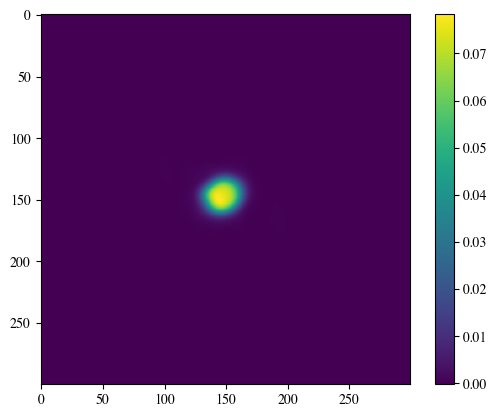

In [ ]:
plt.imshow(data3['hr']['jy_beam'][0,0,...])
plt.colorbar()
